### 3,4 Features Selection und Modelling

In [21]:
airports = pd.read_csv('airports.csv', encoding = 'unicode_escape')
airports_terms_of_lease = pd.read_csv('airports_terms_of_lease_.csv')
passengersEU = pd.read_csv('passengersEU.csv')
passengersWW = pd.read_csv('passengersWW.csv')

In [22]:
def summarize_data(df):
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary['Missing Values'] = df.isnull().sum()
    summary['Unique Values'] = df.nunique()
    return summary

# Summarize each dataset
airports_summary = summarize_data(airports)
airports_terms_of_lease_summary = summarize_data(airports_terms_of_lease)
passengersEU_summary = summarize_data(passengersEU)
passengersWW_summary = summarize_data(passengersWW)

In [23]:
print(airports_summary)
print(airports_terms_of_lease_summary)
print(passengersEU_summary)
print(passengersWW_summary)

            Data Type  Missing Values  Unique Values
name           object               0             34
continent      object               0              5
iso_country    object               0             24
iata_code      object               0             34
coordinates    object               0             34
                    Data Type  Missing Values  Unique Values
Airport                object               0             12
sqm of store            int64               0             12
price per sqm/month     int64               0              6
                     Data Type  Missing Values  Unique Values
name                    object               0         116550
sex                     object               0              2
birth_date              object               0          37999
shopped_at              object               0             22
business_trip           object               0              2
traveled_with_family    object               0              2
lugg

In [1]:
import pandas as pd

In [2]:
airports = pd.read_csv('cleaned_airport.csv', encoding = 'unicode_escape')


In [3]:
airports_terms_of_lease = pd.read_csv('cleaned_terms_of_lease.csv')
passengersEU = pd.read_excel('cleaned_Passenger_EU.xlsx')
passengersWW = pd.read_excel('cleaned_Passenger_WW.xlsx')

In [4]:
def summarize_data(df):
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary['Missing Values'] = df.isnull().sum()
    summary['Unique Values'] = df.nunique()
    return summary

# Summarize each dataset
airports_summary = summarize_data(airports)
airports_terms_of_lease_summary = summarize_data(airports_terms_of_lease)
passengersEU_summary = summarize_data(passengersEU)
passengersWW_summary = summarize_data(passengersWW)

In [5]:
print(airports_summary)
print(airports_terms_of_lease_summary)
print(passengersEU_summary)
print(passengersWW_summary)

                          Data Type  Missing Values  Unique Values
name;iata_code;Airport_ID    object               0             34
                    Data Type  Missing Values  Unique Values
Airport;total_price    object               0             12
                     Data Type  Missing Values  Unique Values
sex                      int64               0              2
shopped_at               int64               0             22
business_trip            int64               0              2
traveled_with_family     int64               0              2
total_flighttime       float64               0          16064
total_traveltime       float64               0          17138
layover_time           float64               0          11415
amount_spent_cat         int64               0              5
departure_IATA_1       float64           65162             34
destination_IATA_1     float64           59498             34
destination_IATA_2     float64          120123             34


### Model: Klassifikator  - 5 Kategorien RandomForestClassifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

In [7]:
passengersEU = pd.read_excel("cleaned_Passenger_EU.xlsx")

In [8]:
# Preprocess the EU data for modeling
# Encode categorical variables
label_encoders = {}
for column in ['sex', 'business_trip', 'traveled_with_family', 'shopped_at']:
    le = LabelEncoder()
    passengersEU[column] = le.fit_transform(passengersEU[column])
    label_encoders[column] = le

In [9]:
# Assume 'layover_time' and other categorical variables as features
X = passengersEU[['sex', 'business_trip', 'traveled_with_family', 'layover_time', 'shopped_at']]
y = passengersEU['amount_spent_cat']

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize and train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predict on the test set and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5236510757363784

In [13]:
print("accuracy:",accuracy)

accuracy: 0.5236510757363784


### Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best parameters to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))

Improved Accuracy: 0.5297009112564752


### Experimenting with Different Models

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classifier Accuracy: 0.5322342798805157


###  Cross-Validation

In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and calculate the average accuracy
cv_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
print("Average CV Accuracy:", cv_scores.mean())

Average CV Accuracy: 0.5295461001152557


## 5. Evaluation

###  1. Confusion Matrix

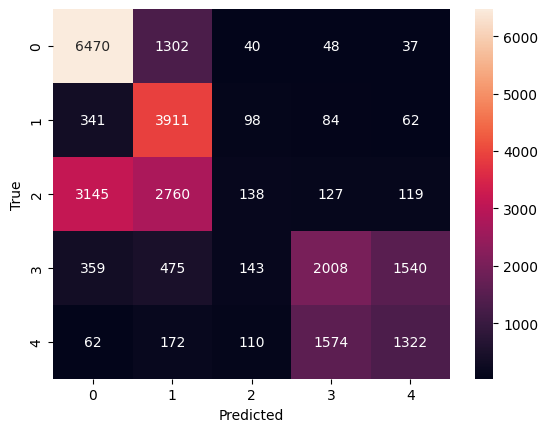

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 2. Precision, Recall, and F1 Score

In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.82      0.71      7897
           1       0.45      0.87      0.60      4496
           2       0.26      0.02      0.04      6289
           3       0.52      0.44      0.48      4525
           4       0.43      0.41      0.42      3240

    accuracy                           0.52     26447
   macro avg       0.46      0.51      0.45     26447
weighted avg       0.47      0.52      0.46     26447



### 3. Class Distribution Analysis

In [16]:
print(y.value_counts())

0    39170
2    31444
1    22841
3    22384
4    16395
Name: amount_spent_cat, dtype: int64


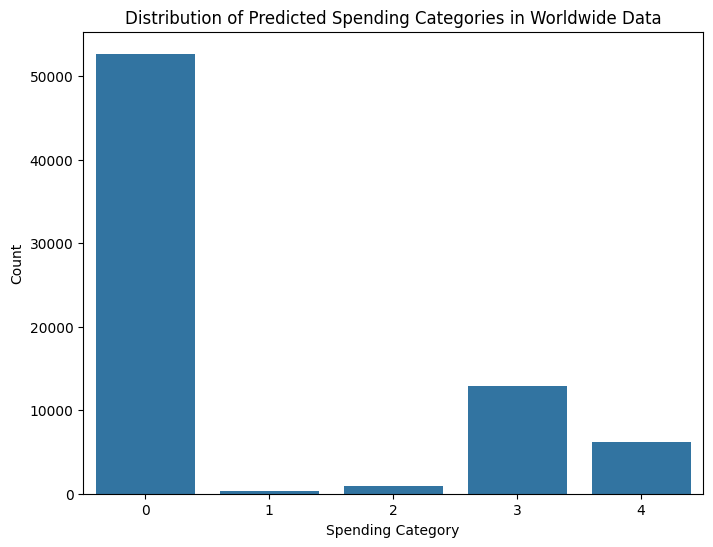

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
worldwide_data=pd.read_csv("predicted_passengersWW.csv")
# Visualize the distribution of predicted spending categories
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_spending_category', data=worldwide_data)
plt.title('Distribution of Predicted Spending Categories in Worldwide Data')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.show()

#### 4. Feature Importance Analysis

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#  train  model on the resampled data
clf.fit(X_resampled, y_resampled)
y_pred_resampled = clf.predict(X_test)
y_pred_resampled
# Evaluate the model again with the resampled data


array([3, 3, 1, ..., 0, 1, 1], dtype=int64)

### Handling Imbalanced Classes with SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# train  model on the resampled data
clf.fit(X_resampled, y_resampled)
y_pred_resampled = clf.predict(X_test)

# Evaluate the model again with the resampled data


########### End ##########

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables in the EU dataset
passengersEU['sex_encoded'] = le.fit_transform(passengersEU['sex'])
passengersEU['business_trip_encoded'] = le.fit_transform(passengersEU['business_trip'])
passengersEU['traveled_with_family_encoded'] = le.fit_transform(passengersEU['traveled_with_family'])
passengersEU['shopped_at_encoded'] = le.fit_transform(passengersEU['shopped_at'])

# Prepare features and target for model training
X = passengersEU[['sex_encoded', 'business_trip_encoded', 'traveled_with_family_encoded', 'layover_time', 'shopped_at_encoded']]
y = passengersEU['amount_spent_cat']


In [16]:
# Fill missing values in categorical columns with 'Unknown'
categorical_columns_eu = ['departure_IATA_1', 'destination_IATA_1', 'destination_IATA_2']
categorical_columns_ww = ['departure_IATA_1', 'destination_IATA_1', 'destination_IATA_2']

passengersEU[categorical_columns_eu] = passengersEU[categorical_columns_eu].fillna('Unknown')
passengersWW[categorical_columns_ww] = passengersWW[categorical_columns_ww].fillna('Unknown')
passengersEU = passengersEU.fillna(0) 
passengersWW = passengersWW.fillna(0) 


In [17]:
def transform_with_unseen_labels(encoder, data, default_value='unknown'):
    classes = encoder.classes_.tolist()
    # Check if default_value is not in classes, then add it
    if default_value not in classes:
        encoder.classes_ = np.append(encoder.classes_, default_value)
    data_transformed = data.apply(lambda x: x if x in classes else default_value)
    return encoder.transform(data_transformed)


In [19]:
import numpy as np
worldwide_data = passengersWW

In [20]:
# Assuming 'label_encoders' is a dictionary of fitted LabelEncoders from  training dataset
worldwide_data['sex_encoded'] = transform_with_unseen_labels(label_encoders['sex'], worldwide_data['sex'], default_value='unknown')
worldwide_data['business_trip_encoded'] = transform_with_unseen_labels(label_encoders['business_trip'], worldwide_data['business_trip'], default_value='unknown')
worldwide_data['traveled_with_family_encoded'] = transform_with_unseen_labels(label_encoders['traveled_with_family'], worldwide_data['traveled_with_family'], default_value='unknown')
worldwide_data['shopped_at_encoded'] = transform_with_unseen_labels(label_encoders['shopped_at'], worldwide_data['shopped_at'], default_value='unknown')


In [21]:
worldwide_features = worldwide_data[['sex_encoded', 'business_trip_encoded', 'traveled_with_family_encoded', 'layover_time', 'shopped_at_encoded']]
predicted_categories = clf.predict(worldwide_features)
predicted_categories

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- business_trip_encoded
- sex_encoded
- shopped_at_encoded
- traveled_with_family_encoded
Feature names seen at fit time, yet now missing:
- business_trip
- sex
- shopped_at
- traveled_with_family


In [22]:
# Encode the categorical variables in the worldwide dataset
for column in ['sex', 'business_trip', 'traveled_with_family', 'shopped_at']:
    worldwide_data[f'{column}_encoded'] = transform_with_unseen_labels(
        label_encoders[column], worldwide_data[column], default_value='unknown'
    )

# Prepare features for prediction
features_worldwide = worldwide_data[['sex_encoded', 'business_trip_encoded', 'traveled_with_family_encoded', 'layover_time', 'shopped_at_encoded']]

# Predict spending categories
predicted_categories_worldwide = clf.predict(features_worldwide)

# Optionally, save the predictions to a new CSV file
worldwide_data['predicted_spending_category'] = predicted_categories_worldwide
worldwide_data.to_csv('predicted_passengersWW.csv', index=False)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- business_trip_encoded
- sex_encoded
- shopped_at_encoded
- traveled_with_family_encoded
Feature names seen at fit time, yet now missing:
- business_trip
- sex
- shopped_at
- traveled_with_family


## 没用

In [23]:
def transform_with_unseen_labels(encoder, data, default_value='unknown'):
    """
    Transform the data using the provided encoder, replacing unseen labels with a default value.
    
    Args:
    - encoder: Fitted LabelEncoder.
    - data: Data to transform.
    - default_value: Value to use for unseen labels.
    
    Returns:
    - Transformed data with unseen labels replaced by the default value.
    """
    # Find the classes in the encoder
    classes = encoder.classes_.tolist()
    
    # Replace unseen labels in data with the default_value
    data_transformed = data.apply(lambda x: x if x in classes else default_value)
    
    # Transform data, ensuring all values now are known to the encoder
    return encoder.transform(data_transformed)

# Example usage with 'shopped_at' column (adjust 'default_value' as needed)
worldwide_data['shopped_at_encoded'] = transform_with_unseen_labels(
    label_encoders['shopped_at'], 
    worldwide_data['shopped_at'], 
    default_value='unknown'  # Ensure 'unknown' or equivalent is in the encoder's classes
)


In [24]:
worldwide_data['sex_encoded'] = transform_with_unseen_labels(label_encoders['sex'], worldwide_data['sex'])
worldwide_data['business_trip_encoded'] = transform_with_unseen_labels(label_encoders['business_trip'], worldwide_data['business_trip'])
# Repeat for other categorical features as necessary


In [25]:
worldwide_features = worldwide_data[['sex_encoded', 'business_trip_encoded', 'traveled_with_family_encoded', 'layover_time', 'shopped_at_encoded']]
predicted_categories = clf.predict(worldwide_features)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- business_trip_encoded
- sex_encoded
- shopped_at_encoded
- traveled_with_family_encoded
Feature names seen at fit time, yet now missing:
- business_trip
- sex
- shopped_at
- traveled_with_family


##不管用

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Example of model training with RandomForestClassifier on the EU dataset
X = passengersEU[['sex_encoded', 'business_trip_encoded', 'traveled_with_family_encoded', 'layover_time', 'shopped_at_encoded']]
y = passengersEU['amount_spent_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy on EU data:", accuracy_score(y_test, y_pred))

# Apply the model to predict spending categories in the worldwide dataset
# Step 1: Encode categorical variables in the worldwide dataset using the same LabelEncoders
# Note: This step requires the actual worldwide dataset to be adjusted accordingly
worldwide_data = passengersWW
# Example encoding (assuming the same categorical variables exist in the worldwide dataset)
worldwide_data['sex_encoded'] = label_encoders['sex'].transform(worldwide_data['sex'])
worldwide_data['business_trip_encoded'] = label_encoders['business_trip'].transform(worldwide_data['business_trip'])
worldwide_data['traveled_with_family_encoded'] = label_encoders['traveled_with_family'].transform(worldwide_data['traveled_with_family'])
worldwide_data['shopped_at_encoded'] = label_encoders['shopped_at'].transform(worldwide_data['shopped_at'])

# Step 2: Prepare features for prediction
worldwide_features = worldwide_data[['sex_encoded', 'business_trip_encoded', 'traveled_with_family_encoded', 'layover_time', 'shopped_at_encoded']]

# Step 3: Predict spending categories
predicted_categories = clf.predict(worldwide_features)

# Follow with profitability analysis and airport ranking based on predicted spending and lease costs


Accuracy on EU data: 0.5236510757363784


ValueError: y contains previously unseen labels: [8, 11, 12, 16, 17, 18, 19, 22, 26, 28, 29, 30]

In [ ]:
##Profitability Analysis
